In [1]:
"""
import pandas as pd
df=pd.read_csv('/content/ddata.csv')
"""

"\nimport pandas as pd\ndf=pd.read_csv('/content/ddata.csv')\n"

In [2]:
import pandas as pd
df=pd.read_csv("G:\My Drive\ps\data\ddata.csv")

In [3]:
df=df.drop(columns=['Unnamed: 0'])

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,subpopulation,height
0,0.75,0.5,0.5,2.5,2.5,2.5,0.5,2.5,2.5,Aus,145.8
1,0.75,0.5,0.5,2.5,2.5,2.5,2.5,2.5,2.5,Indica Intermediate,185.6
2,0.75,0.5,0.5,2.5,2.5,2.5,2.5,2.5,2.5,Indica III,203.6
3,0.75,0.5,0.5,2.5,2.5,2.5,2.5,2.5,2.5,Indica Intermediate,190.2
4,0.75,0.5,0.5,2.5,2.5,2.5,2.5,2.5,2.5,Indica III,193.8


In [5]:
df.shape

(529, 11)

In [6]:
x=df.iloc[:,:-2]
y=df.iloc[:,-2]
yh=df.iloc[:,-1]

In [7]:
x

,0,1,2,3,4,5,6,7,8
0,0.75,0.5,0.5,2.50,2.5,2.5,0.5,2.5,2.5
1,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5
2,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5
3,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5
4,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5
...,...,...,...,...,...,...,...,...,...
524,0.75,0.5,2.5,0.75,1.5,1.5,0.5,0.5,0.5
525,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5
526,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5
527,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5


In [8]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)


In [9]:
yd=pd.get_dummies(y_resampled) 

In [10]:
yd1=pd.get_dummies(y)

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_resampled,yd,random_state=42,test_size=0.22) 

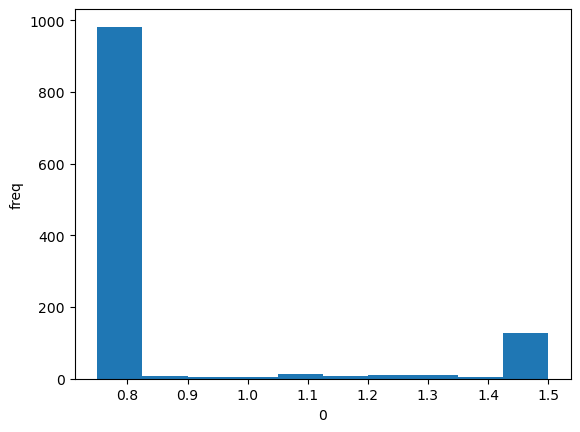

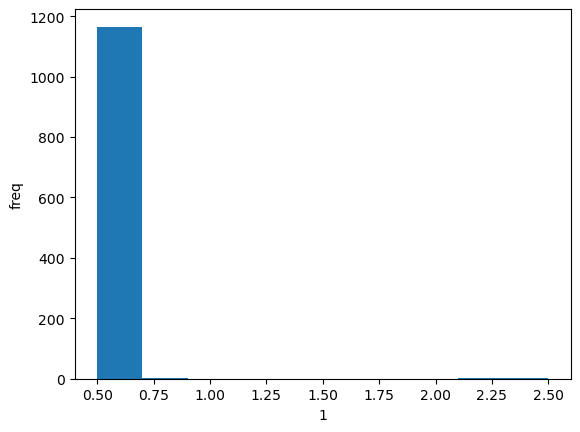

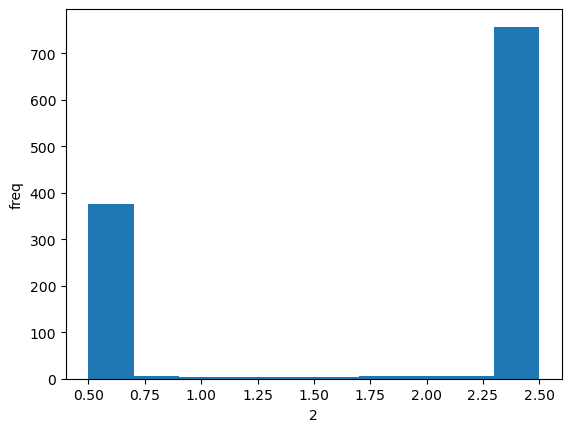

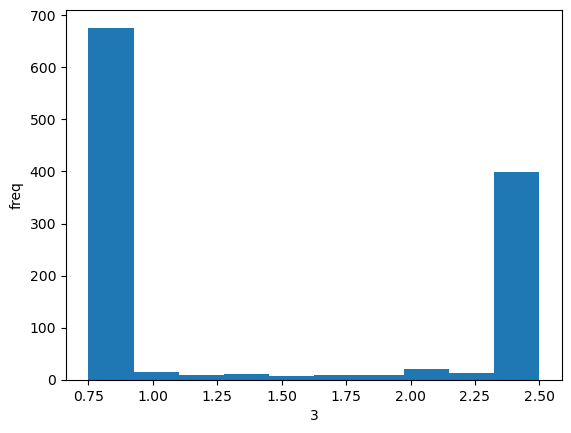

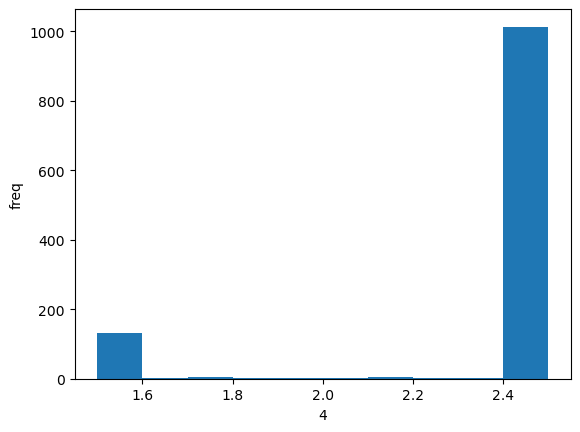

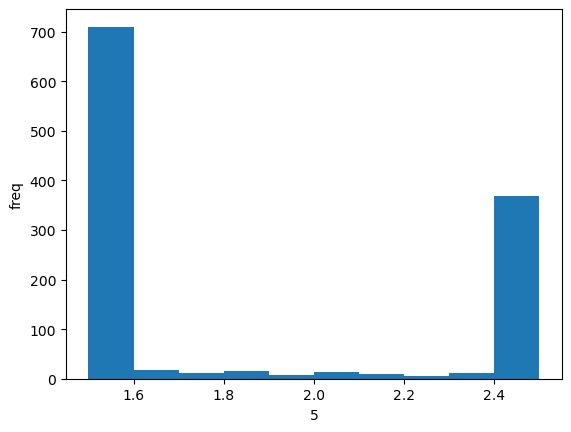

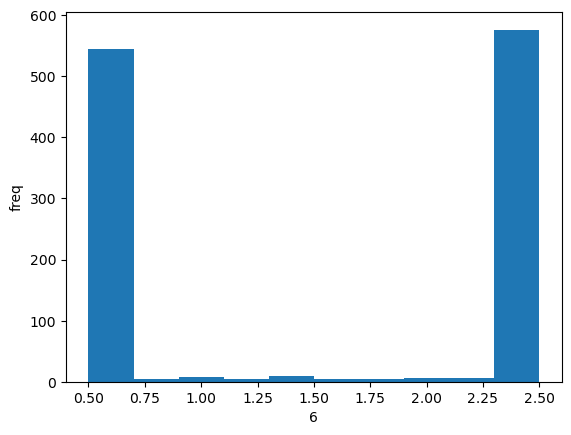

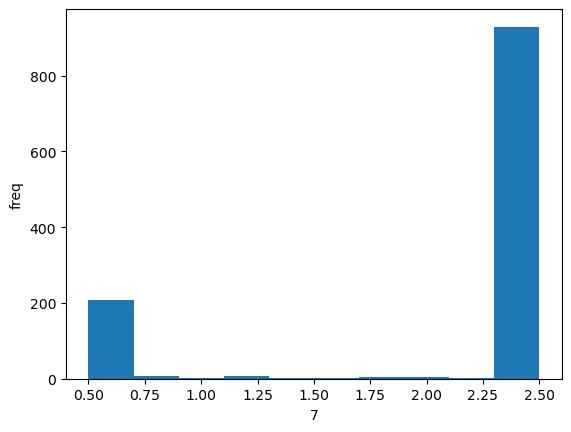

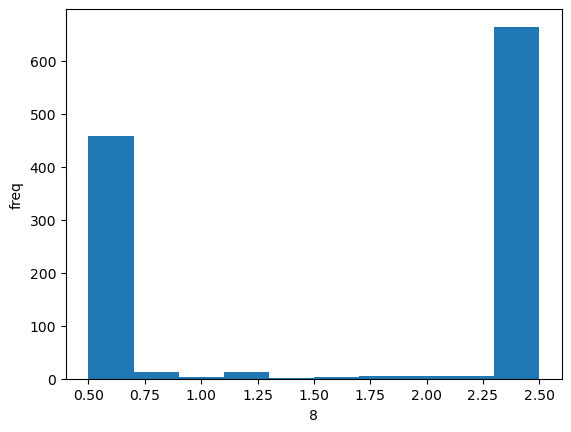

In [12]:
import matplotlib.pyplot as plt
for i in X_resampled.columns:
  plt.hist(X_resampled[i])
  plt.xlabel(i)
  plt.ylabel('freq')
  plt.show()

In [13]:
# as we can see here, the data is not normally distributed
# we'll use minmax scaler to scale the data

In [14]:
x_train=pd.DataFrame(x_train)
y_train=pd.DataFrame(y_train)

In [15]:
y_train

,Aus,Indica I,Indica II,Indica III,Indica Intermediate,Intermediate,Japonica Intermediate,Temperate Japonica,Tropical Japonica,VI/Aromatic
242,0,0,0,0,0,0,0,1,0,0
398,0,0,0,0,1,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,1
925,0,0,0,0,0,0,1,0,0,0
371,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1044,0,0,0,0,0,0,0,0,1,0
1095,0,0,0,0,0,0,0,0,0,1
1130,0,0,0,0,0,0,0,0,0,1
860,0,0,0,0,0,1,0,0,0,0


# classification using ANN

In [16]:
from keras.layers import Dense,Dropout,Activation,LeakyReLU
from keras.models import Sequential
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [17]:
def create_model(hidden_layers=1, nodes=10, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(9, activation=activation, input_dim=x_train.shape[1]))
    for _ in range(hidden_layers):
        model.add(Dense(nodes, activation='relu'))
    model.add(Dense(10,kernel_initializer='glorot_uniform',activation='softmax'))
    model.compile(metrics=['accuracy'],optimizer=optimizer,loss='categorical_crossentropy') 
    return model


In [18]:
"""
model = KerasClassifier(build_fn=create_model)
param_dist = {
    "batch_size":np.arange(16,128,16),
    "epochs": range(30,500,10),
    "hidden_layers":range(1,10), 
    "nodes":[4,8,16,32,64,128]
}
# Perform random search with cross-validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5s, cv=3)
random_search.fit(x_train,y_train) 
""" 

'\nmodel = KerasClassifier(build_fn=create_model)\nparam_dist = {\n    "batch_size":np.arange(16,128,16),\n    "epochs": range(30,500,10),\n    "hidden_layers":range(1,10), \n    "nodes":[4,8,16,32,64,128]\n}\n# Perform random search with cross-validation\nrandom_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=5s, cv=3)\nrandom_search.fit(x_train,y_train) \n'

In [19]:
# random_search.best_params_

In [20]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(912, 9) (912, 10) (258, 9) (258, 10)


In [21]:
model=Sequential()
model.add(Dense(9,kernel_initializer='he_normal',input_dim=x_train.shape[1],activation='relu'))
model.add(Dense(16,kernel_initializer='he_normal',activation='relu'))
model.add(Dense(16,kernel_initializer='he_normal',activation='relu'))
model.add(Dense(10,kernel_initializer='glorot_uniform',activation='softmax'))
opt=Adam(learning_rate=0.01,decay=1e-6)
model.compile(metrics=['accuracy'],optimizer=opt,loss='categorical_crossentropy')
history=model.fit(x_train,y_train,epochs=200,validation_split=0.2,verbose=1)  

Epoch 1/200
23/23 [==============================] - 1s 21ms/step - loss: 2.4522 - accuracy: 0.1701 - val_loss: 2.0836 - val_accuracy: 0.2240
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 1.9001 - accuracy: 0.2716 - val_loss: 1.7166 - val_accuracy: 0.2678
Epoch 3/200
23/23 [==============================] - 0s 6ms/step - loss: 1.5151 - accuracy: 0.4033 - val_loss: 1.3878 - val_accuracy: 0.4754
Epoch 4/200
23/23 [==============================] - 0s 6ms/step - loss: 1.3390 - accuracy: 0.4623 - val_loss: 1.2831 - val_accuracy: 0.4809
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 1.2170 - accuracy: 0.5281 - val_loss: 1.1711 - val_accuracy: 0.5628
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 1.1482 - accuracy: 0.5432 - val_loss: 1.1420 - val_accuracy: 0.5902
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 1.1124 - accuracy: 0.5569 - val_loss: 1.0615 - val_accuracy: 0.6284
Epoch 8/200


In [22]:
model.evaluate(x_test,y_test,batch_size=16)  

17/17 [==============================] - 0s 3ms/step - loss: 0.8252 - accuracy: 0.7016


[0.8252151608467102, 0.7015503644943237]

In [23]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
eypred=model.predict(x_test) 

9/9 [==============================] - 0s 3ms/step


In [24]:
eypred.shape,y_test.shape

((258, 10), (258, 10))

In [25]:
"""
from sklearn.metrics import r2_score
r2_score(eypred,y_test)
precision_score(eypred,y_test,average='micro')
"""

"\nfrom sklearn.metrics import r2_score\nr2_score(eypred,y_test)\nprecision_score(eypred,y_test,average='micro')\n"

In [26]:
# accuracy is 72.5 % 

In [27]:
#model.save('testc.h5')

In [28]:
#9,16,16,10
#400-epochs
#740-acc

In [29]:
#!pip install keras

In [30]:
x_train.shape[1]

9

In [31]:
# add a dropout layer, p-ratio is 0.5 i.e randoming selecting half of the neurons in each propagation
# number of nuerons in hidden layers basically in between number of neurons in first layer and number of ouputclasses and it should be in power of 2
#9,16,16,10,10 - 78.7 for classification
#epochs=700

In [32]:
"""
def model():
  model=Sequential()
  model.add(Dense(9,kernel_initializer='he_normal',input_dim=x_train.shape[1],activation='relu'))
  model.add(Dense(16,kernel_initializer='he_normal',activation='relu'))
  model.add(Dense(16,kernel_initializer='he_normal',activation='relu'))
  model.add(Dense(16,kernel_initializer='he_normal',activation='relu'))
  model.add(Dense(10,kernel_initializer='glorot_uniform',activation='softmax'))
  opt=Adam(learning_rate=0.01,decay=1e-6)
  model.compile(metrics=['accuracy'],optimizer=opt,loss='categorical_crossentropy')
  return model
"""

"\ndef model():\n  model=Sequential()\n  model.add(Dense(9,kernel_initializer='he_normal',input_dim=x_train.shape[1],activation='relu'))\n  model.add(Dense(16,kernel_initializer='he_normal',activation='relu'))\n  model.add(Dense(16,kernel_initializer='he_normal',activation='relu'))\n  model.add(Dense(16,kernel_initializer='he_normal',activation='relu'))\n  model.add(Dense(10,kernel_initializer='glorot_uniform',activation='softmax'))\n  opt=Adam(learning_rate=0.01,decay=1e-6)\n  model.compile(metrics=['accuracy'],optimizer=opt,loss='categorical_crossentropy')\n  return model\n"

In [33]:
"""
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
estimator = KerasClassifier(build_fn=model, epochs=700, batch_size=32, verbose=1)
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, x,yd, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
"""

# Baseline: 71% (0.97%)

'\nfrom keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import KFold\nfrom sklearn.model_selection import cross_val_score\nestimator = KerasClassifier(build_fn=model, epochs=700, batch_size=32, verbose=1)\nkfold = KFold(n_splits=5, shuffle=True)\nresults = cross_val_score(estimator, x,yd, cv=kfold)\nprint("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))\n'

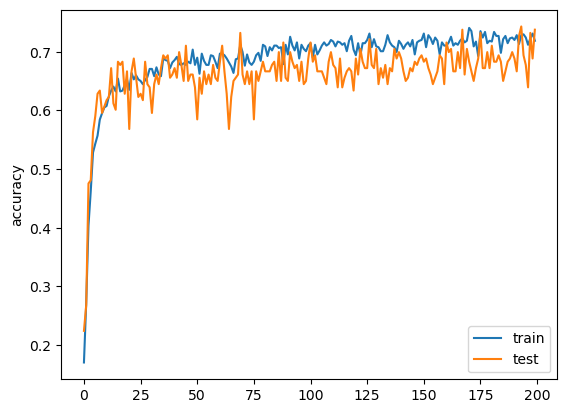

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.ylabel('accuracy')
plt.legend()
plt.show()

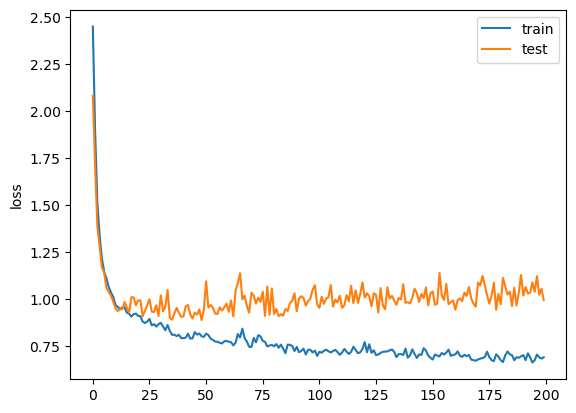

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.ylabel('loss')
plt.show()

In [36]:
import numpy as np
y_pred=model.predict(x_test)
Y1_pred=np.argmax(y_pred,axis=1)
Y2_pred=np.argmax(np.array(y_test),axis=1)
Y1_pred,Y2_pred

9/9 [==============================] - 0s 2ms/step


(array([2, 7, 3, 7, 7, 8, 3, 5, 1, 7, 8, 2, 7, 8, 0, 9, 8, 4, 5, 2, 8, 6,
        2, 0, 3, 3, 6, 0, 0, 9, 9, 5, 5, 5, 3, 3, 4, 5, 5, 7, 2, 2, 5, 1,
        7, 1, 6, 4, 8, 9, 3, 9, 9, 7, 6, 7, 0, 2, 3, 7, 9, 2, 2, 5, 3, 3,
        0, 5, 8, 0, 2, 7, 3, 7, 5, 8, 7, 7, 3, 0, 5, 4, 2, 5, 8, 6, 2, 2,
        5, 9, 6, 4, 4, 3, 0, 7, 2, 2, 2, 6, 3, 1, 9, 7, 7, 3, 7, 5, 5, 3,
        6, 3, 2, 7, 8, 0, 1, 9, 1, 3, 1, 7, 0, 1, 4, 5, 2, 2, 6, 8, 3, 6,
        0, 1, 7, 1, 5, 7, 7, 0, 5, 9, 8, 5, 4, 6, 2, 2, 7, 0, 3, 0, 8, 7,
        8, 8, 2, 7, 5, 0, 8, 5, 3, 2, 2, 6, 1, 2, 4, 9, 2, 3, 2, 8, 5, 3,
        0, 2, 2, 1, 3, 2, 6, 5, 3, 8, 3, 9, 2, 5, 9, 9, 2, 8, 9, 7, 5, 5,
        8, 5, 6, 6, 3, 8, 0, 7, 9, 4, 0, 3, 9, 1, 9, 7, 1, 9, 9, 3, 0, 9,
        2, 5, 2, 3, 5, 7, 6, 5, 6, 4, 2, 3, 3, 9, 9, 5, 9, 7, 9, 7, 0, 3,
        5, 0, 6, 0, 9, 8, 3, 6, 2, 3, 5, 3, 5, 3, 4, 9], dtype=int64),
 array([2, 7, 3, 6, 8, 8, 3, 5, 4, 7, 8, 2, 6, 8, 0, 9, 5, 4, 5, 2, 2, 6,
        2, 0, 3, 1, 5, 0, 0, 9, 9, 5, 5, 

In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y2_pred,Y1_pred))

[[22  0  0  0  0  2  0  0  0  7]
 [ 0 10  4  4  7  0  0  0  0  0]
 [ 0  0 22  0  0  2  0  0  1  0]
 [ 0  0  1 28  0  4  0  0  0  0]
 [ 1  4  7  3  4  2  0  0  2  0]
 [ 0  0  2  2  1 23  1  2  1  0]
 [ 0  0  0  0  0  0 16 12  0  0]
 [ 0  0  0  0  0  2  2 17  0  0]
 [ 0  0  0  0  0  0  0  1 18  0]
 [ 0  0  0  0  0  0  0  0  0 21]]


In [38]:
pred=model.predict(x)
pred=pd.DataFrame(pred) 

17/17 [==============================] - 0s 2ms/step


In [39]:
Pr=pred.idxmax(axis=1)
xx1=pd.DataFrame(x)
xx1['9']=Pr

In [40]:
xx1['height']=yh
xx1

,0,1,2,3,4,5,6,7,8,9,height
0,0.75,0.5,0.5,2.50,2.5,2.5,0.5,2.5,2.5,0,145.80
1,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,3,185.60
2,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,3,203.60
3,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,3,190.20
4,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,3,193.80
...,...,...,...,...,...,...,...,...,...,...,...
524,0.75,0.5,2.5,0.75,1.5,1.5,0.5,0.5,0.5,7,192.07
525,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,7,196.80
526,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,7,206.73
527,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,7,172.46


In [41]:
xx1.columns=xx1.columns.astype(str)

In [42]:
#model.save('modelc.h5')

In [43]:
# now predicting the height based on the sequences and predicted subpopulation

In [44]:
from sklearn.preprocessing import MinMaxScaler
Xh=xx1.iloc[:,:-1]
Yh=xx1.iloc[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(Xh,Yh,test_size=0.33,random_state=42)
mm1=MinMaxScaler()
mm1.fit(X_train)
X_train=mm1.transform(X_train)
X_test=mm1.transform(X_test)

# svr with non-linear kernel

In [45]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

svr=SVR()

In [46]:
from sklearn.model_selection import GridSearchCV
rparam={'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 'scale'],
    'kernel':['rbf','linear']}
rrsc=GridSearchCV(svr,rparam,cv=3)
rrsc.fit(X_train,Y_train)
rrsc.best_params_


{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [47]:
svr_new=SVR(kernel='rbf',C=10,gamma='scale')
svr_new.fit(X_train,Y_train)

SVR(C=10)

In [48]:
from sklearn.metrics import mean_absolute_error as mae
Y_pred=svr_new.predict(X_test)
mae(Y_test,Y_pred)

16.925992778448816

In [49]:
import joblib
#joblib.dump(svr_new,'svrr.joblib')

In [50]:
# the mae is almost similar to randomforest regressor

# randomforestregressor

In [51]:
xx1

,0,1,2,3,4,5,6,7,8,9,height
0,0.75,0.5,0.5,2.50,2.5,2.5,0.5,2.5,2.5,0,145.80
1,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,3,185.60
2,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,3,203.60
3,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,3,190.20
4,0.75,0.5,0.5,2.50,2.5,2.5,2.5,2.5,2.5,3,193.80
...,...,...,...,...,...,...,...,...,...,...,...
524,0.75,0.5,2.5,0.75,1.5,1.5,0.5,0.5,0.5,7,192.07
525,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,7,196.80
526,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,7,206.73
527,0.75,0.5,2.5,2.50,1.5,1.5,0.5,0.5,0.5,7,172.46


In [52]:
X_train.shape,X_test.shape

((354, 10), (175, 10))

In [53]:
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
grid_par = { 'n_estimators' : [i for i in range(1,25)],
               'criterion':['squared_error','poisson','friedman_mse'],
               'max_depth':[i for i in range(1,20)],
              }
gss = GridSearchCV(RandomForestRegressor(random_state=42), grid_par, verbose = 1, cv=5, n_jobs = -1)
g_ress = gss.fit(X_train,Y_train)
g_ress.best_score_ ,gss.best_params_
"""

# {'criterion': 'poisson', 'max_depth': 6, 'n_estimators': 10})

"\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import GridSearchCV\ngrid_par = { 'n_estimators' : [i for i in range(1,25)],\n               'criterion':['squared_error','poisson','friedman_mse'],\n               'max_depth':[i for i in range(1,20)],\n              }\ngss = GridSearchCV(RandomForestRegressor(random_state=42), grid_par, verbose = 1, cv=5, n_jobs = -1)\ng_ress = gss.fit(X_train,Y_train)\ng_ress.best_score_ ,gss.best_params_\n"

In [54]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.ensemble import RandomForestRegressor
modelr=RandomForestRegressor(n_estimators=10,criterion='poisson',max_depth=6,random_state=42)
modelr.fit(X_train,Y_train)
Y_pred=modelr.predict(X_test)
print(mae(Y_test,Y_pred)),print((1-mape(Y_test,Y_pred))*100)

16.385231899601784
80.53724632326887


(None, None)

In [55]:
subb=pd.DataFrame(pd.get_dummies(df['subpopulation'])).columns
subb=list(subb)

In [56]:
import random
nuc=['A','T','C','G']
ss=[]
"""
for i in range(12):
  st="".join(random.choices(nuc,k=9))
  ss.append(st)
"""
ss=['ACTGTATTT']

import numpy as np
import pandas as pd
dicc={'A':1.5,'T':2.5,'C':0.5,'G':0.75}
encoded=[]
for i in ss:
  array = np.array(list(i))
  new_arr=np.array([dicc[i] for i in array])
  encoded.append((new_arr))

enc_dfff=pd.DataFrame(encoded)
zz=model.predict(enc_dfff)
zz=pd.DataFrame(zz)
id=zz.idxmax(axis=1)
enc_dfff['9']=id
id=list(id)
enc_dfff.columns=enc_dfff.columns.astype(str)
res=modelr.predict(enc_dfff)
res_df=pd.DataFrame()
lis=list()
for i in id:
  lis.append(subb[i])
res_df['sequence']=ss
res_df['subpopulation']=lis
res_df['height']=res
res_df

1/1 [==============================] - 0s 40ms/step


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,sequence,subpopulation,height
0,ACTGTATTT,Intermediate,115.163378


In [57]:
#model.save("modelc.h5")

In [58]:
#from joblib import dump,load 
#dump(modelr, 'modelr.joblib')

In [59]:
1
1884.9/11

171.35454545454547

In [60]:
13
(112.2+134.8+181.4+170.36+145.65)/5

148.882

In [61]:
10
(125.6+151.2+156.6+186.2+196.2+178.27+147.17+177.4)/8

164.83

In [62]:
6
(161.8+154.2+141.4+175.77+169.67+177.29+119.03)/7

157.02285714285713

# regression using neural network

<Axes: >

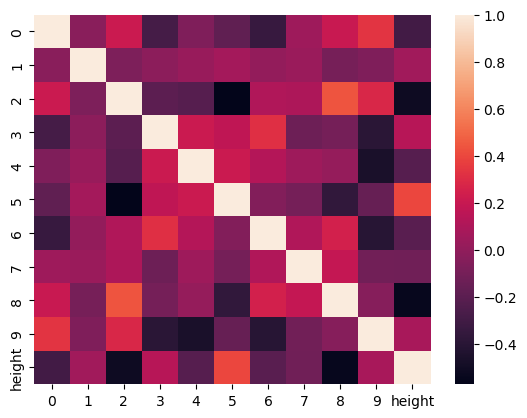

In [63]:
import seaborn as sns
sns.heatmap(xx1.corr())

In [64]:
X_test=pd.DataFrame(X_test)
X_train=pd.DataFrame(X_train)

In [65]:
X_train

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.777778
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.555556
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.000000
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.888889
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.222222
...,...,...,...,...,...,...,...,...,...,...
349,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.111111
350,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.333333
351,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.888889
352,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.222222


In [85]:
from keras import regularizers
from keras.optimizers import Adam
modeL=Sequential()
modeL.add(Dense(10,activation='relu',input_dim=X_train.shape[1],kernel_initializer='normal'))
modeL.add(Dense(8,activation='relu',kernel_initializer='normal'))
modeL.add(Dense(1,activation='linear',kernel_initializer='glorot_uniform')) 
opt=Adam(learning_rate=0.01)
modeL.compile(loss='mae',optimizer=opt)
history3=modeL.fit(X_train,Y_train,batch_size=16,epochs=80,validation_split=0.1,verbose=1)  

Epoch 1/80
20/20 [==============================] - 1s 18ms/step - loss: 128.4403 - val_loss: 124.7447
Epoch 2/80
20/20 [==============================] - 0s 5ms/step - loss: 118.3140 - val_loss: 102.7872
Epoch 3/80
20/20 [==============================] - 0s 5ms/step - loss: 76.3854 - val_loss: 37.2235
Epoch 4/80
20/20 [==============================] - 0s 5ms/step - loss: 41.3465 - val_loss: 33.4290
Epoch 5/80
20/20 [==============================] - 0s 6ms/step - loss: 38.1158 - val_loss: 29.7867
Epoch 6/80
20/20 [==============================] - 0s 5ms/step - loss: 34.8228 - val_loss: 27.4946
Epoch 7/80
20/20 [==============================] - 0s 6ms/step - loss: 32.0370 - val_loss: 25.6173
Epoch 8/80
20/20 [==============================] - 0s 6ms/step - loss: 29.2811 - val_loss: 24.1498
Epoch 9/80
20/20 [==============================] - 0s 6ms/step - loss: 27.3716 - val_loss: 23.2143
Epoch 10/80
20/20 [==============================] - 0s 6ms/step - loss: 26.1127 - val_loss: 22

In [86]:
modeL.evaluate(X_test,Y_test,batch_size=32) 

6/6 [==============================] - 0s 3ms/step - loss: 17.8530


17.852989196777344

In [ ]:
Y_test=Y_test.values

In [101]:
yyy_pred=modeL.predict(X_test)
yyy_pred=np.reshape(yyy_pred,(-1,))
print(type(yyy_pred))
corr=np.corrcoef(yyy_pred,Y_test)
corr

6/6 [==============================] - 0s 2ms/step
<class 'numpy.ndarray'>


array([[1.        , 0.64685448],
       [0.64685448, 1.        ]])

In [141]:
#modeL.save('modelr.h5')

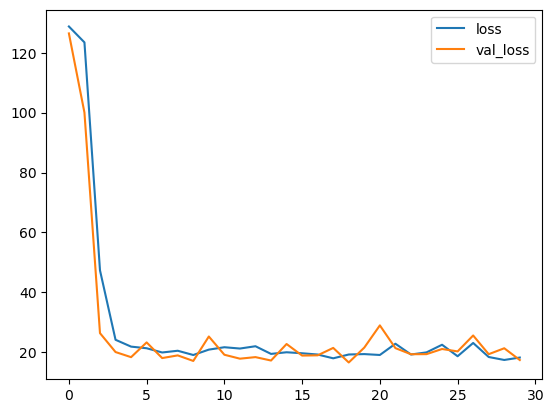

In [142]:
import matplotlib.pyplot as plt
plt.plot(history3.history['loss'],label='loss')
plt.plot(history3.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [143]:
#modeL.save('modelr.h5')

In [144]:
ac=[72.4,73.3,74.6]
los=[16.7,17.8,15.65]
com=pd.DataFrame()
com.index=['ann-clasif,randomforestreg','ann-clasi,ann-regre','randomfore-clasi,randomforestreg']
com['accuracy for clasif']=ac
com['mae for reg']=los
com

,accuracy for clasif,mae for reg
"ann-clasif,randomforestreg",73.3,16.70
"ann-clasi,ann-regre",73.3,17.80
"randomfore-clasi,randomforestreg",74.6,15.65


In [145]:
import random
nuc=['A','T','C','G']
ss=[]
"""
for i in range(12):
  st="".join(random.choices(nuc,k=9))
  ss.append(st)
"""
ss=['GCCTTTCTC']

import numpy as np
import pandas as pd
dicc={'A':1.5,'T':2.5,'C':0.5,'G':0.75}
encoded=[]
for i in ss:
  array = np.array(list(i))
  new_arr=np.array([dicc[i] for i in array])
  encoded.append((new_arr))

enc_dfff=pd.DataFrame(encoded)
zz=model.predict(enc_dfff)
zz=pd.DataFrame(zz)
id=zz.idxmax(axis=1)
enc_dfff['9']=id
id=list(id)
enc_dfff.columns=enc_dfff.columns.astype(str)
res=modeL.predict(enc_dfff)
res_df=pd.DataFrame()
lis=list()
for i in id:
  lis.append(subb[i])
res_df['sequence']=ss
res_df['subpopulation']=lis
res_df['height']=res
res_df

1/1 [==============================] - 0s 121ms/step


,sequence,subpopulation,height
0,GCCTTTCTC,Aus,104.136757


In [146]:
32,8,16,16,16,16,1- 563
32,8,16,64,16,64,1- 562
10,8,16,32,64,128,1- 543

(10, 8, 16, 32, 64, 128, -542)